# Лабораторная работа 10. Построение пайплайна полиномиальной регрессии
## <a href="https://www.kaggle.com/datasets/ayushparwal2026/shopping-dataset">Набор данных о покупках</a>

### Описание набора данных:
1. Customer ID - <b>Целое</b> - Идентификатор клиента. Уникальный идентификатор, присваиваемый каждому клиенту для целей отслеживания и анализа.
2. Gender - <b>Категориальное</b> - пол клиента, который может быть разделен на мужской, женский или недвоичный. Понимание гендерного распределения клиентов может помочь розничным торговцам адаптировать свои маркетинговые стратегии и предложения продуктов к различным демографическим сегментам.
3. Income - <b>Целое</b> - уровень дохода клиента (в тыс. долларов в год), обычно подразделяемый на категории или диапазоны доходов. Данные о доходах дают представление о покупательной способности различных сегментов клиентов и помогают розничным торговцам определять стратегии ценообразования и доступность продуктов.
4. Spending Score - <b>Целое</b> - числовая оценка ([0; 100]), присваиваемая каждому клиенту на основе его поведения в отношении расходов, часто рассчитываемая с использованием таких факторов, как частота покупок, средняя стоимость транзакции и общие расходы. Оценка расходов помогает розничным торговцам выявлять ценных клиентов, которые вносят значительный вклад в продажи и прибыльность.
5. Age - <b>Целое</b> - возраст клиента, обычно подразделяемый на возрастные группы или диапазоны. Данные о возрасте необходимы для понимания демографического состава клиентской базы и адаптации маркетинговых сообщений и предложений продуктов к различным возрастным сегментам. Кроме того, информация о возрасте может быть использована при принятии решений, связанных с дизайном продукта, упаковкой и планировкой магазина, чтобы соответствовать конкретной возрастной группе населения.

Подключение библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Загрузка данных

In [2]:
dataset = pd.read_csv('Shopping_data.csv')

dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Разделение на матрицу признаков и зависимую переменную

In [8]:
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 3].values

y *= 1000

print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[1 2 3 4 5]
Зависимая переменная
[15000 15000 16000 16000 17000]


Обработка пропущенных значений

In [ ]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean').fit(X[:, 1:3])

X[:, 1:3] = imputer.transform(X[:, 1:3])

Замена категории кодом (LabelEncoder)

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder_y = LabelEncoder()

y = label_encoder_y.fit_transform(y)

Преобразования категориальных меток в числовые значения (OneHotEncoder)

In [ ]:
from sklearn.preprocessing import OneHotEncoder


label_encoder_X = LabelEncoder()
onehotencoder = OneHotEncoder()

X[:, 0] = label_encoder_X.fit_transform(X[:, 0])
X = onehotencoder.fit_transform(X).toarray()

Обучение линейной модели

In [10]:
from sklearn.linear_model import LinearRegression


X = X.reshape(-1, 1)

lin_reg = LinearRegression()

lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Обучение полиномиальной модели*
<br>
<br>
<i>Полиномиальная модель - это модель, которая используется для замены (аппроксимации) сложных нелинейных зависимостей между переменными. В отличие от линейной модели, которая предполагает линейную зависимость между предикторами и зависимой переменной, полиномиальная модель позволяет учитывать криволинейные отношения путем включения степеней их значений в модель.
<br/>Например, в полиномиальной модели вместо простой линейной зависимости типа y = ax + b могут использоваться более сложные уравнения вида y = ax^2 + bx + c или даже более высоких степеней.</i>

In [11]:
from sklearn.preprocessing import PolynomialFeatures


poly_reg = PolynomialFeatures(degree = 10)

X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Предсказание, обработка и визуализация результатов

[18861.87354684] [24689.63117091]


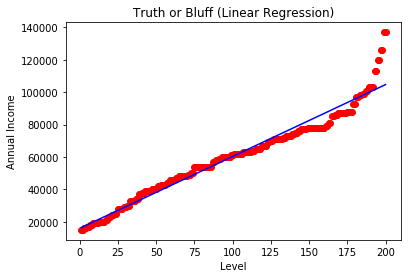

In [15]:
# прогнозирование значения зависимой переменной 
# с использованием линейной и полиноминальной модели для значения 6.5
y_pred_lin = lin_reg.predict([[6.5]])
y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

print(y_pred_lin, y_pred_poly)

# точечная форма изображения регрессии
plt.scatter(X, y, color = 'red')

# построение линейной регрессии
plt.plot(X, lin_reg.predict(X), color = 'blue')

plt.title('Truth or Bluff (Linear Regression)')

plt.xlabel('Level')
plt.ylabel('Annual Income')

plt.show()

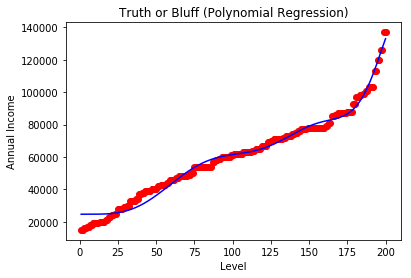

In [16]:
# точечная форма изображения регрессии
plt.scatter(X, y, color = 'red')

# построение полиноминальной регрессии
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')

plt.title('Truth or Bluff (Polynomial Regression)')

plt.xlabel('Level')
plt.ylabel('Annual Income')

plt.show()

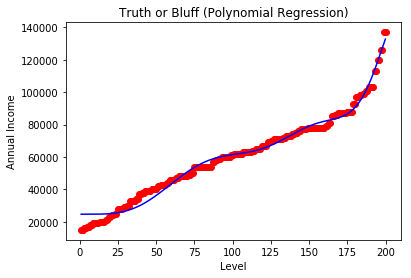

In [17]:
# Создание массива значений X для более плавной линии регрессии
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

# точечная форма изображения регрессии
plt.scatter(X, y, color = 'red')

# построение линейной регрессии
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')

plt.title('Truth or Bluff (Polynomial Regression)')

plt.xlabel('Level')
plt.ylabel('Annual Income')

plt.show()